# Digital Image Processing
### Maurício Pereira Lopes
---

In [1]:
# carregamento de bibliotecas
import numpy as np
import imageio
import cv2
import matplotlib.pyplot as plt
import urllib.request

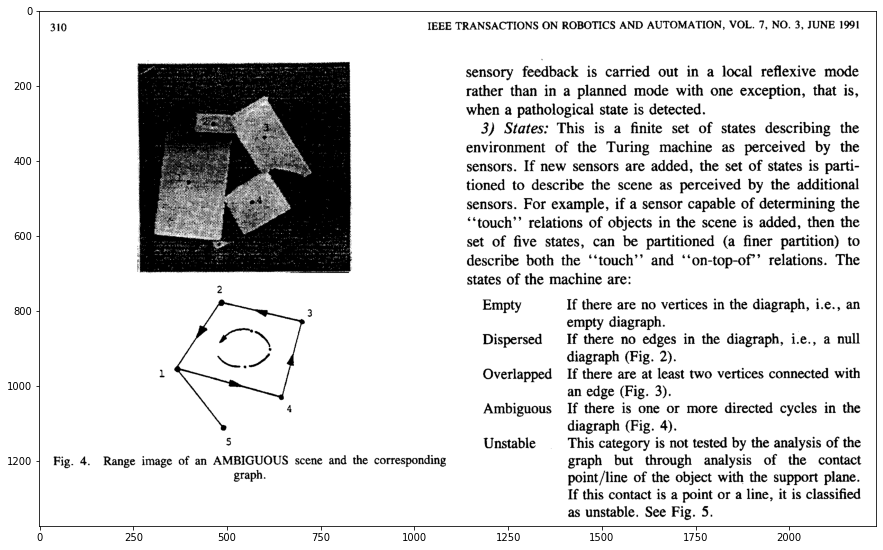

In [2]:
# carregamento da imagem
url = 'https://www.ic.unicamp.br/~helio/imagens_morfologia/bitmap.pbm'
urllib.request.urlretrieve(url, 'image.pbm')

img_original = imageio.imread('image.pbm')

plt.figure(figsize = (15, 15))
plt.imshow(img_original, cmap = "gray")
plt.show()

In [3]:
# verificação dos valores dos pixels
np.unique(img_original)

Array([  0, 255], dtype=uint8)

In [4]:
img_original

Array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [5]:
img_original.shape

(1374, 2233)

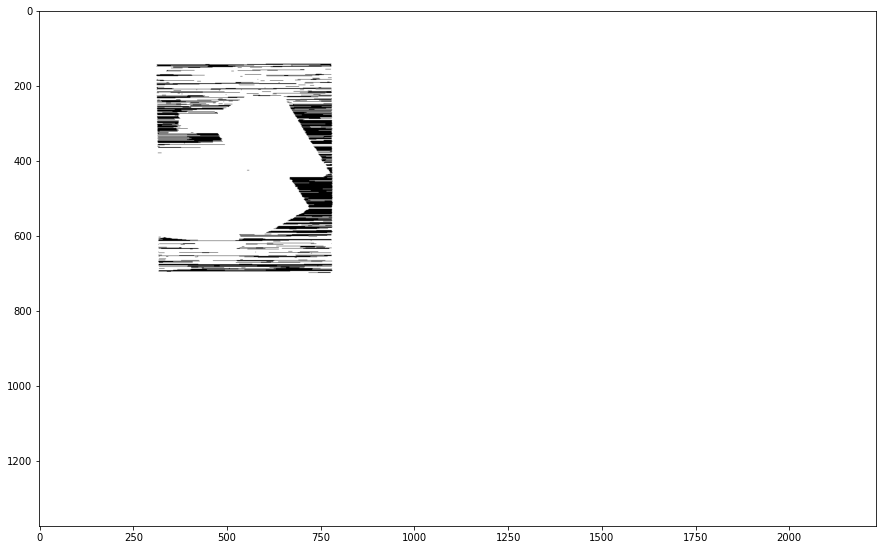

In [6]:
# teste do operador morfológico de dilatação aplicado à imagem original
# dilatação
kernel = np.ones((1, 100))
img_1 = cv2.dilate(img_original, kernel, iterations = 1)

plt.figure(figsize = (15, 15))
plt.imshow(img_1, cmap = "gray")
plt.show()

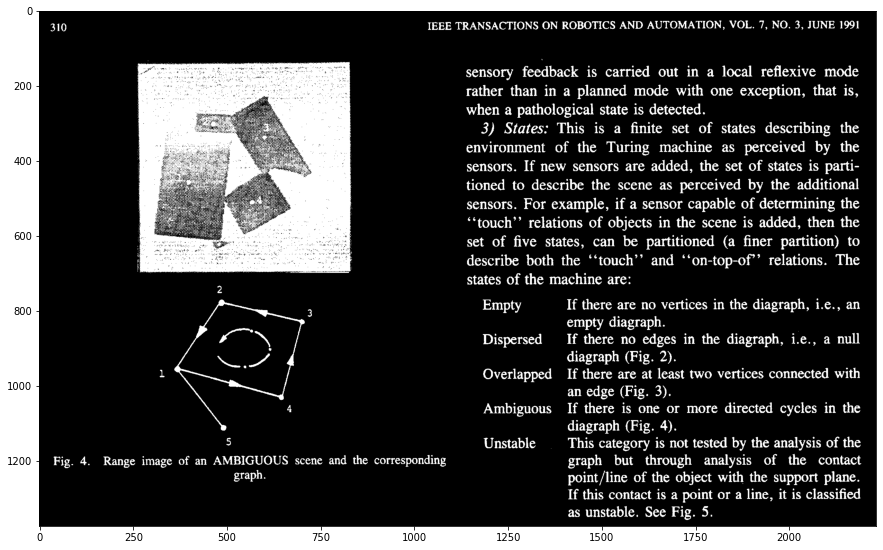

In [7]:
# por padrão, os operadores morfológicos funcionam considerando fundo preto
# e objetos em branco
# por essa razão foi feita a inversão dos valores dos pixels na imagem
img = np.invert(img_original)

plt.figure(figsize = (15, 15))
plt.imshow(img, cmap = "gray")
plt.show()

---
#### Os seguintes passos devem ser realizados:


1) Dilatação de imagem original com um elemento estruturante de 1 pixel de altura e 100 pixels de largura

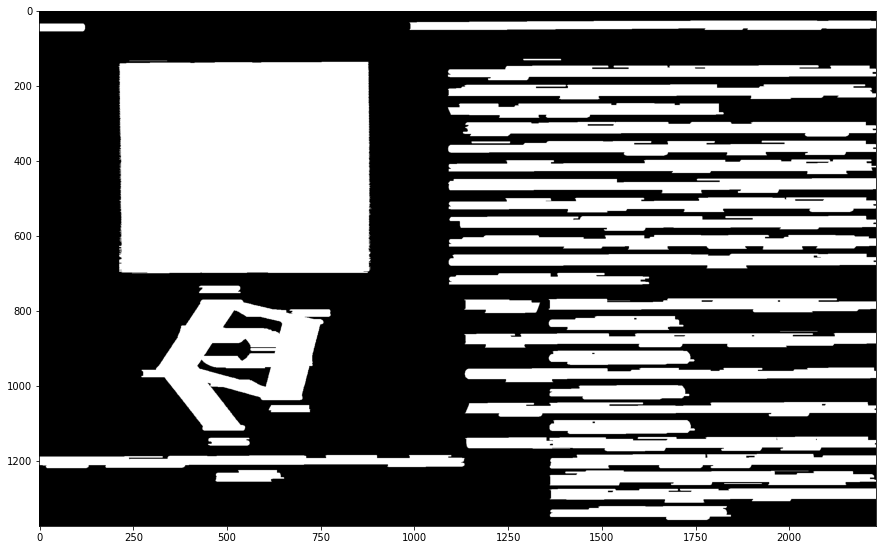

In [8]:
# dilatação
kernel = np.ones((1, 100))
img_1 = cv2.dilate(img, kernel, iterations = 1)

plt.figure(figsize = (15, 15))
plt.imshow(img_1, cmap = "gray")
plt.show()

---
2) Erosão da imagem resultante com o mesmo elemento estruturante do passo (1)

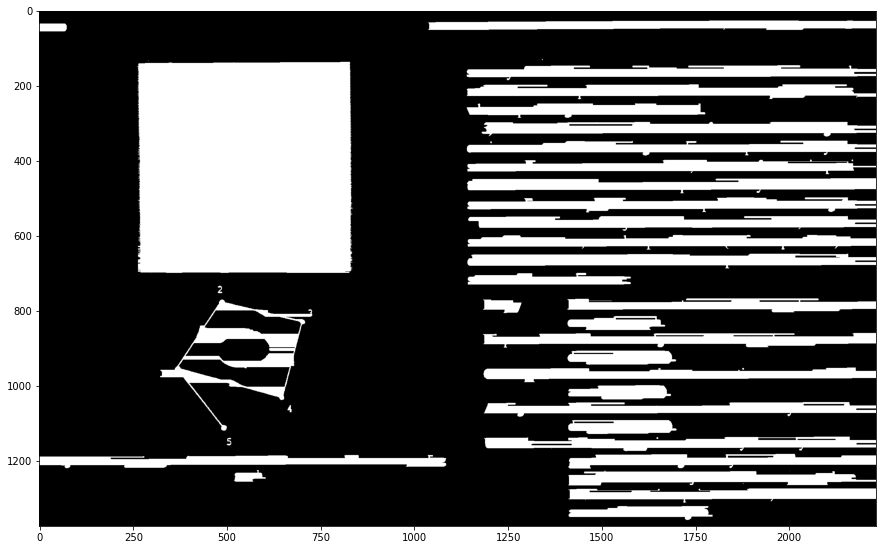

In [9]:
# erosão
kernel = np.ones((1, 100))
img_2 = cv2.erode(img_1, kernel, iterations = 1)

plt.figure(figsize = (15, 15))
plt.imshow(img_2, cmap = "gray")
plt.show()

---
3) Dilatação da imagem original com um elemento estruturante de 200 pixels de altura e 1 pixel de largura

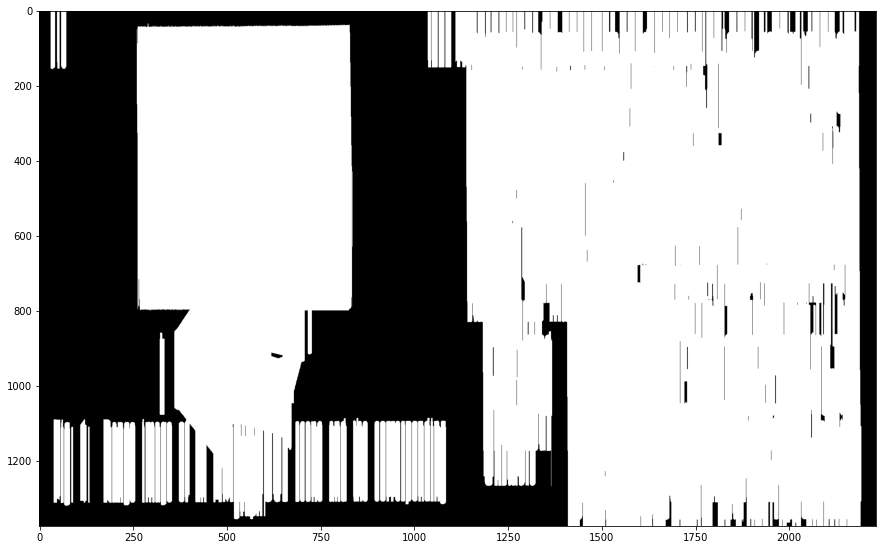

In [10]:
# dilatação
kernel = np.ones((200, 1))
img_3 = cv2.dilate(img, kernel, iterations = 1)

plt.figure(figsize = (15, 15))
plt.imshow(img_3, cmap = "gray")
plt.show()

---
4) Erosão da imagem resultante com o mesmo elemento estruturante do passo (3)

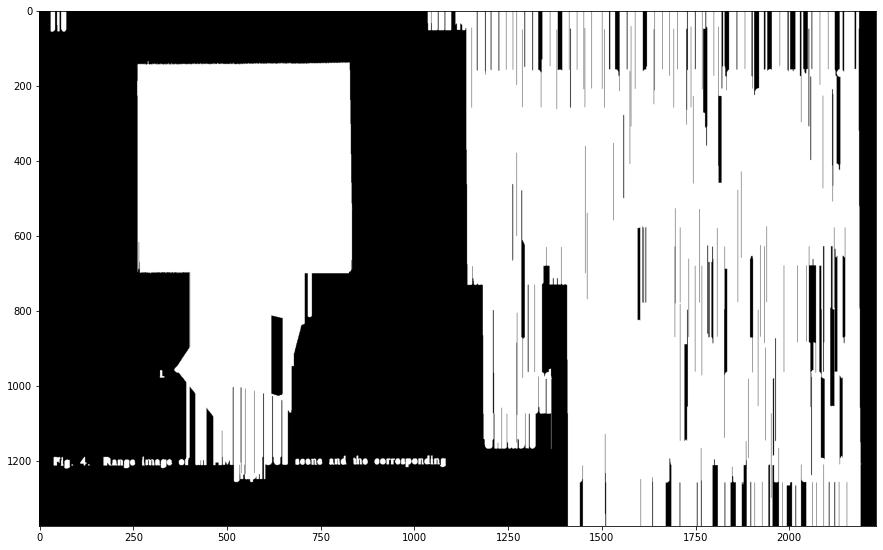

In [11]:
# erosão
kernel = np.ones((200, 1))
img_4 = cv2.erode(img_3, kernel, iterations = 1)

plt.figure(figsize = (15, 15))
plt.imshow(img_4, cmap = "gray")
plt.show()

---
5) Aplicação da intersecção (AND) dos resultados dos passos (2) e (4)

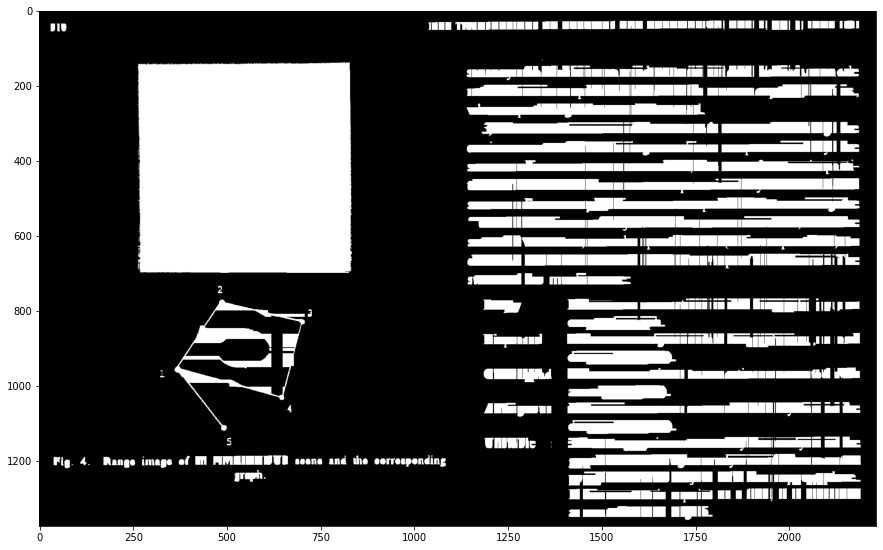

In [12]:
img_5 = np.bitwise_and(img_2, img_4)

plt.figure(figsize = (15, 15))
plt.imshow(img_5, cmap = "gray")
plt.show()

---
6) Fechamento do resultado obtido no passo (5) com um elemento estruturante de 1 pixel de altura e 30 pixels de largura

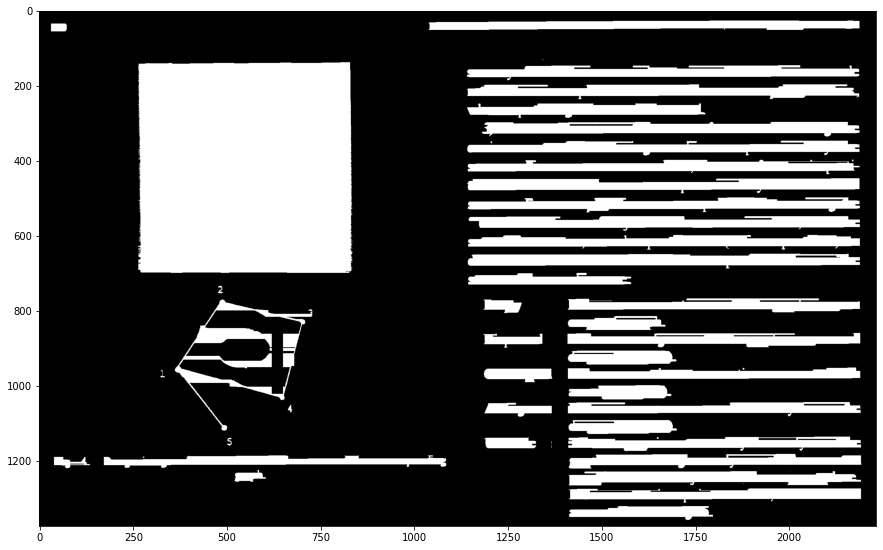

In [13]:
kernel = np.ones((1, 30))

img_6 = cv2.morphologyEx(img_5, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize = (15, 15))
plt.imshow(img_6, cmap = "gray")
plt.show()

---
7) Aplicação de algoritmo para identificação de componentes conexos sobre o resultado do passo (6)

In [14]:
# get external contours
contours = cv2.findContours(img_6, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

# draw contours
img_7 = img_original.copy()
for cntr in contours:
    # get bounding boxes
    pad = 10
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(img_7, (x-pad, y-pad), (x+w+pad, y+h+pad), (0, 0, 255), 4)

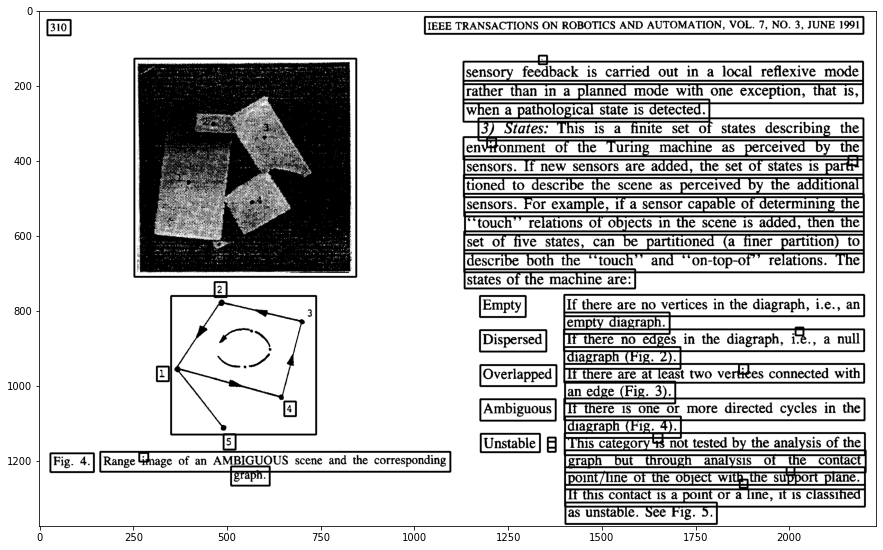

In [15]:
# display result
plt.figure(figsize = (15, 15))
#plt.imshow(img_6, cmap = "gray")
plt.imshow(img_7, cmap = "gray")
plt.show()

---
8) Para cada retângulo envolvendo um objeto, calcule:

a) razão entre o número de pixels pretos e o número total de pixels (altura x largura)

In [16]:
razao_pixels_pretos = []
for cntr in contours:
    x, y, w, h = cv2.boundingRect(cntr)
    n_pixels_pretos = np.sum(img[y:y + h, x:x + w]) / 255
    total_pixels = h * w
    razao_pixels_pretos.append(n_pixels_pretos / total_pixels)

print(len(razao_pixels_pretos))
razao_pixels_pretos

52


[0.23690878378378377,
 0.220748987854251,
 0.0,
 0.0,
 0.2354043392504931,
 0.2980956082394092,
 0.22395833333333334,
 0.75,
 0.23585969100192294,
 0.21017771657157847,
 0.0,
 0.0,
 0.4166666666666667,
 0.37456271864067964,
 0.56,
 0.23493877015003775,
 0.26157299167679793,
 0.45454545454545453,
 0.2786322233836046,
 0.2134240851809421,
 0.2305032654629274,
 0.35526315789473684,
 0.296448087431694,
 0.52,
 0.28764957264957264,
 0.2602540834845735,
 0.2964365639524875,
 0.21770334928229665,
 0.0,
 0.2800041420731076,
 0.3115468409586057,
 0.06213158654934691,
 0.22203742203742205,
 0.4125,
 0.3038932146829811,
 0.21003088689513164,
 0.2165514536451439,
 0.22114463601532566,
 0.23410611854684513,
 0.2167304015296367,
 0.2235205237975321,
 0.4,
 0.45,
 0.20871537726838588,
 0.20510274234206707,
 0.2552410901467505,
 0.22251434034416825,
 0.21467495219885277,
 0.8370760255786994,
 0.0,
 0.36848072562358275,
 0.29763478260869564]

b) razão entre o número de transições verticais e horizontais branco para preto e o número de pixels pretos

In [17]:
transicao_vert = []
transicao_hor = []
for cntr in contours:
    x, y, w, h = cv2.boundingRect(cntr)
    n_pixels_pretos = np.sum(img[y:y + h, x:x + w]) / 255
    if n_pixels_pretos != 0:
        transicao_vert.append(np.count_nonzero(np.diff(img_original[y:y + h, x:x + w] / 255, axis = 0)))
        transicao_hor.append(np.count_nonzero(np.diff(img_original[y:y + h, x:x + w] / 255, axis = -1)))
    else:
        transicao_vert.append(0)
        transicao_hor.append(0)

#razao_transicoes_pxlpretos = (transicao_vert + transicao_hor) / n_pixels_pretos
razao_transicoes_pxlpretos = ((np.array(transicao_vert) + np.array(transicao_hor)) / n_pixels_pretos).tolist()
print(len(razao_transicoes_pxlpretos))
razao_transicoes_pxlpretos

52


[0.2540610026878579,
 0.5106929998831367,
 0.0,
 0.0,
 0.5351174477036345,
 0.06462545284562346,
 0.05328970433563165,
 0.0003505901601028398,
 0.628140703517588,
 0.48393128432861987,
 0.0,
 0.0,
 0.009465934322776674,
 0.10576136496435666,
 0.0007011803202056796,
 0.553698726189085,
 0.2076662381675821,
 0.008063573682365315,
 0.14479373612247282,
 0.49281290171789177,
 0.18756573565501927,
 0.0052588524015425965,
 0.14105410774804253,
 0.0008180437069066262,
 0.5122122239102489,
 0.216664718943555,
 0.12469323360991001,
 0.48287951384831135,
 0.0,
 0.19831716723150636,
 0.08157064391726072,
 0.47563398387285266,
 0.5050835573214911,
 0.008180437069066262,
 0.29285964707257217,
 0.6527988781114876,
 0.6678742549959098,
 0.6906626154025943,
 0.7272408554399906,
 0.6968563748977445,
 0.6852868996143509,
 0.0008180437069066262,
 0.0007011803202056796,
 0.6617973588874606,
 0.6247516653032605,
 0.463947645202758,
 0.6724319270772467,
 0.6726656538506486,
 10.53944139301157,
 0.0,
 0.0285

---
9) Criação de uma regra para classificar cada componente conexo, de acordo com as medidas obtidas no passo (8), como texto ou não texto

0


Número de pixels do elemento: 14208
a - Razão de pixels pretos e total de pixels: 0.23690878378378377
b - Razão das transições para preto e o total de pixels pretos: 0.2540610026878579
a * b = 0.06018928315366904
TEXTO


1


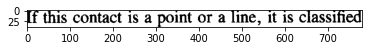

Número de pixels do elemento: 29640
a - Razão de pixels pretos e total de pixels: 0.220748987854251
b - Razão das transições para preto e o total de pixels pretos: 0.5106929998831367
a * b = 0.11273496282845355
TEXTO


2


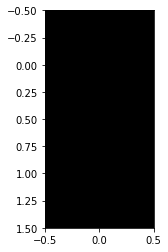

Número de pixels do elemento: 2
a - Razão de pixels pretos e total de pixels: 0.0
b - Razão das transições para preto e o total de pixels pretos: 0.0
a * b = 0.0
NÃO TEXTO


3


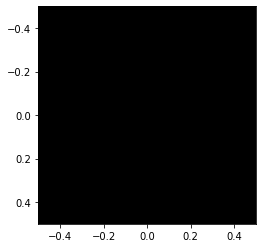

Número de pixels do elemento: 1
a - Razão de pixels pretos e total de pixels: 0.0
b - Razão das transições para preto e o total de pixels pretos: 0.0
a * b = 0.0
NÃO TEXTO


4


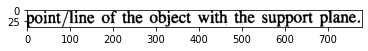

Número de pixels do elemento: 30420
a - Razão de pixels pretos e total de pixels: 0.2354043392504931
b - Razão das transições para preto e o total de pixels pretos: 0.5351174477036345
a * b = 0.12596896919808437
TEXTO


5


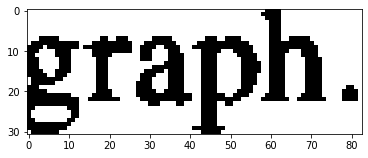

Número de pixels do elemento: 2573
a - Razão de pixels pretos e total de pixels: 0.2980956082394092
b - Razão das transições para preto e o total de pixels pretos: 0.06462545284562346
a * b = 0.019264563673763384
TEXTO


6


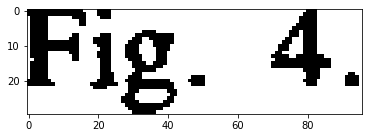

Número de pixels do elemento: 2880
a - Razão de pixels pretos e total de pixels: 0.22395833333333334
b - Razão das transições para preto e o total de pixels pretos: 0.05328970433563165
a * b = 0.011934673366834172
TEXTO


7


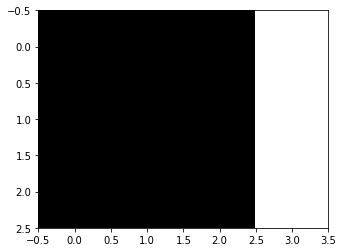

Número de pixels do elemento: 12
a - Razão de pixels pretos e total de pixels: 0.75
b - Razão das transições para preto e o total de pixels pretos: 0.0003505901601028398
a * b = 0.00026294262007712984
NÃO TEXTO


8


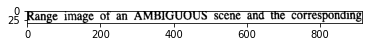

Número de pixels do elemento: 30162
a - Razão de pixels pretos e total de pixels: 0.23585969100192294
b - Razão das transições para preto e o total de pixels pretos: 0.628140703517588
a * b = 0.1481530722373888
TEXTO


9


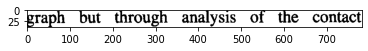

Número de pixels do elemento: 30498
a - Razão de pixels pretos e total de pixels: 0.21017771657157847
b - Razão das transições para preto e o total de pixels pretos: 0.48393128432861987
a * b = 0.10171157231774063
TEXTO


10


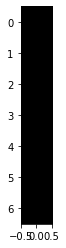

Número de pixels do elemento: 7
a - Razão de pixels pretos e total de pixels: 0.0
b - Razão das transições para preto e o total de pixels pretos: 0.0
a * b = 0.0
NÃO TEXTO


11


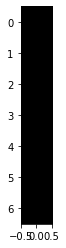

Número de pixels do elemento: 7
a - Razão de pixels pretos e total de pixels: 0.0
b - Razão das transições para preto e o total de pixels pretos: 0.0
a * b = 0.0
NÃO TEXTO


12


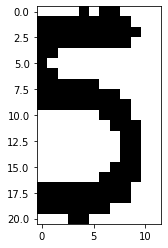

Número de pixels do elemento: 252
a - Razão de pixels pretos e total de pixels: 0.4166666666666667
b - Razão das transições para preto e o total de pixels pretos: 0.009465934322776674
a * b = 0.003944139301156948
TEXTO


13


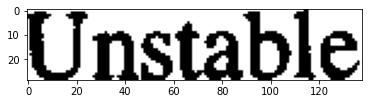

Número de pixels do elemento: 4002
a - Razão de pixels pretos e total de pixels: 0.37456271864067964
b - Razão das transições para preto e o total de pixels pretos: 0.10576136496435666
a * b = 0.03961426438819856
TEXTO


14


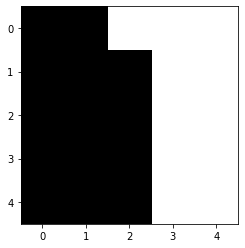

Número de pixels do elemento: 25
a - Razão de pixels pretos e total de pixels: 0.56
b - Razão das transições para preto e o total de pixels pretos: 0.0007011803202056796
a * b = 0.0003926609793151806
NÃO TEXTO


15


Número de pixels do elemento: 30459
a - Razão de pixels pretos e total de pixels: 0.23493877015003775
b - Razão das transições para preto e o total de pixels pretos: 0.553698726189085
a * b = 0.13008529776450614
TEXTO


16


Número de pixels do elemento: 10693
a - Razão de pixels pretos e total de pixels: 0.26157299167679793
b - Razão das transições para preto e o total de pixels pretos: 0.2076662381675821
a * b = 0.054319879187760885
TEXTO


17


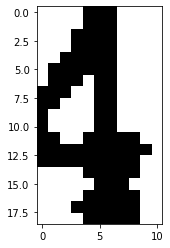

Número de pixels do elemento: 209
a - Razão de pixels pretos e total de pixels: 0.45454545454545453
b - Razão das transições para preto e o total de pixels pretos: 0.008063573682365315
a * b = 0.0036652607647115064
TEXTO


18


Número de pixels do elemento: 6697
a - Razão de pixels pretos e total de pixels: 0.2786322233836046
b - Razão das transições para preto e o total de pixels pretos: 0.14479373612247282
a * b = 0.04034420062782355
TEXTO


19


Número de pixels do elemento: 29678
a - Razão de pixels pretos e total de pixels: 0.2134240851809421
b - Razão das transições para preto e o total de pixels pretos: 0.49281290171789177
a * b = 0.10517814271450658
TEXTO


20


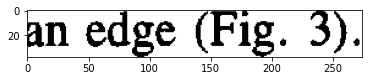

Número de pixels do elemento: 10412
a - Razão de pixels pretos e total de pixels: 0.2305032654629274
b - Razão das transições para preto e o total de pixels pretos: 0.18756573565501927
a * b = 0.043234514557438174
TEXTO


21


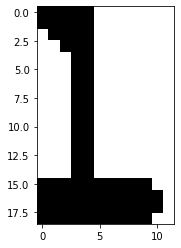

Número de pixels do elemento: 228
a - Razão de pixels pretos e total de pixels: 0.35526315789473684
b - Razão das transições para preto e o total de pixels pretos: 0.0052588524015425965
a * b = 0.0018682765110743435
TEXTO


22


Número de pixels do elemento: 6588
a - Razão de pixels pretos e total de pixels: 0.296448087431694
b - Razão das transições para preto e o total de pixels pretos: 0.14105410774804253
a * b = 0.0418152204662913
TEXTO


23


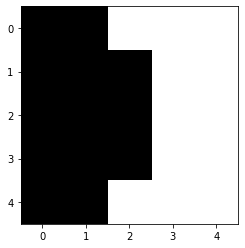

Número de pixels do elemento: 25
a - Razão de pixels pretos e total de pixels: 0.52
b - Razão das transições para preto e o total de pixels pretos: 0.0008180437069066262
a * b = 0.0004253827275914456
NÃO TEXTO


24


Número de pixels do elemento: 23400
a - Razão de pixels pretos e total de pixels: 0.28764957264957264
b - Razão das transições para preto e o total de pixels pretos: 0.5122122239102489
a * b = 0.1473376273136703
TEXTO


25


Número de pixels do elemento: 11020
a - Razão de pixels pretos e total de pixels: 0.2602540834845735
b - Razão das transições para preto e o total de pixels pretos: 0.216664718943555
a * b = 0.05638787785209762
TEXTO


26


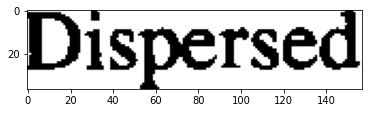

Número de pixels do elemento: 5809
a - Razão de pixels pretos e total de pixels: 0.2964365639524875
b - Razão das transições para preto e o total de pixels pretos: 0.12469323360991001
a * b = 0.036963633719446554
TEXTO


27


Número de pixels do elemento: 29678
a - Razão de pixels pretos e total de pixels: 0.21770334928229665
b - Razão das transições para preto e o total de pixels pretos: 0.48287951384831135
a * b = 0.10512448746458453
TEXTO


28


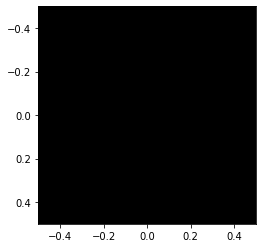

Número de pixels do elemento: 1
a - Razão de pixels pretos e total de pixels: 0.0
b - Razão das transições para preto e o total de pixels pretos: 0.0
a * b = 0.0
NÃO TEXTO


29


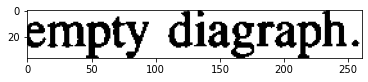

Número de pixels do elemento: 9657
a - Razão de pixels pretos e total de pixels: 0.2800041420731076
b - Razão das transições para preto e o total de pixels pretos: 0.19831716723150636
a * b = 0.055529628269026944
TEXTO


30


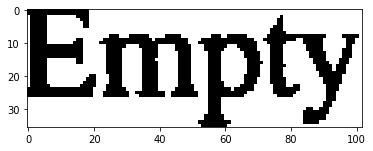

Número de pixels do elemento: 3672
a - Razão de pixels pretos e total de pixels: 0.3115468409586057
b - Razão das transições para preto e o total de pixels pretos: 0.08157064391726072
a * b = 0.025413076427381883
TEXTO


31


Número de pixels do elemento: 128083
a - Razão de pixels pretos e total de pixels: 0.06213158654934691
b - Razão das transições para preto e o total de pixels pretos: 0.47563398387285266
a * b = 0.02955189403480682
NÃO TEXTO


32


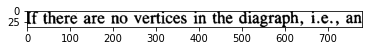

Número de pixels do elemento: 28860
a - Razão de pixels pretos e total de pixels: 0.22203742203742205
b - Razão das transições para preto e o total de pixels pretos: 0.5050835573214911
a * b = 0.11214745098115438
TEXTO


33


Número de pixels do elemento: 240
a - Razão de pixels pretos e total de pixels: 0.4125
b - Razão das transições para preto e o total de pixels pretos: 0.008180437069066262
a * b = 0.003374430290989833
TEXTO


34


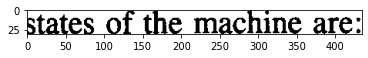

Número de pixels do elemento: 13485
a - Razão de pixels pretos e total de pixels: 0.3038932146829811
b - Razão das transições para preto e o total de pixels pretos: 0.29285964707257217
a * b = 0.08899805959980725
TEXTO


35


Número de pixels do elemento: 40794
a - Razão de pixels pretos e total de pixels: 0.21003088689513164
b - Razão das transições para preto e o total de pixels pretos: 0.6527988781114876
a * b = 0.13710792733390267
TEXTO


36


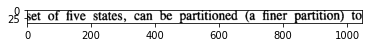

Número de pixels do elemento: 40794
a - Razão de pixels pretos e total de pixels: 0.2165514536451439
b - Razão das transições para preto e o total de pixels pretos: 0.6678742549959098
a * b = 0.14462914077153177
TEXTO


37


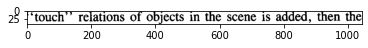

Número de pixels do elemento: 41760
a - Razão de pixels pretos e total de pixels: 0.22114463601532566
b - Razão das transições para preto e o total de pixels pretos: 0.6906626154025943
a * b = 0.1527363326925996
TEXTO


38


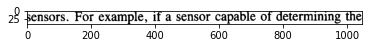

Número de pixels do elemento: 41840
a - Razão de pixels pretos e total de pixels: 0.23410611854684513
b - Razão das transições para preto e o total de pixels pretos: 0.7272408554399906
a * b = 0.1702515339157435
TEXTO


39


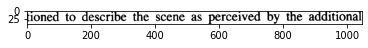

Número de pixels do elemento: 41840
a - Razão de pixels pretos e total de pixels: 0.2167304015296367
b - Razão das transições para preto e o total de pixels pretos: 0.6968563748977445
a * b = 0.15102996194007523
TEXTO


40


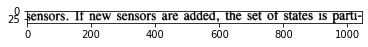

Número de pixels do elemento: 39710
a - Razão de pixels pretos e total de pixels: 0.2235205237975321
b - Razão das transições para preto e o total de pixels pretos: 0.6852868996143509
a * b = 0.1531756867533865
TEXTO


41


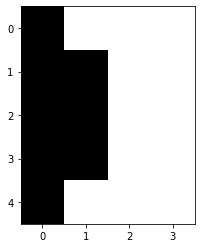

Número de pixels do elemento: 20
a - Razão de pixels pretos e total de pixels: 0.4
b - Razão das transições para preto e o total de pixels pretos: 0.0008180437069066262
a * b = 0.0003272174827626505
NÃO TEXTO


42


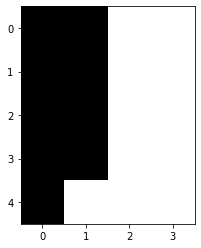

Número de pixels do elemento: 20
a - Razão de pixels pretos e total de pixels: 0.45
b - Razão das transições para preto e o total de pixels pretos: 0.0007011803202056796
a * b = 0.00031553114409255584
NÃO TEXTO


43


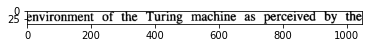

Número de pixels do elemento: 41880
a - Razão de pixels pretos e total de pixels: 0.20871537726838588
b - Razão das transições para preto e o total de pixels pretos: 0.6617973588874606
a * b = 0.13812728543541772
TEXTO


44


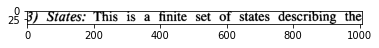

Número de pixels do elemento: 39273
a - Razão de pixels pretos e total de pixels: 0.20510274234206707
b - Razão das transições para preto e o total de pixels pretos: 0.6247516653032605
a * b = 0.12813827983647197
TEXTO


45


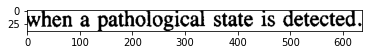

Número de pixels do elemento: 24804
a - Razão de pixels pretos e total de pixels: 0.2552410901467505
b - Razão das transições para preto e o total de pixels pretos: 0.463947645202758
a * b = 0.11841850273256978
TEXTO


46


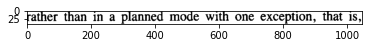

Número de pixels do elemento: 41840
a - Razão de pixels pretos e total de pixels: 0.22251434034416825
b - Razão das transições para preto e o total de pixels pretos: 0.6724319270772467
a * b = 0.1496257466799514
TEXTO


47


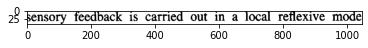

Número de pixels do elemento: 41840
a - Razão de pixels pretos e total de pixels: 0.21467495219885277
b - Razão das transições para preto e o total de pixels pretos: 0.6726656538506486
a * b = 0.14440446708619803
TEXTO


48


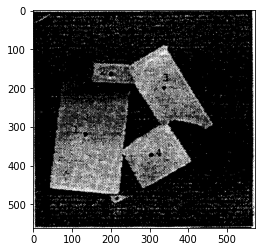

Número de pixels do elemento: 320892
a - Razão de pixels pretos e total de pixels: 0.8370760255786994
b - Razão das transições para preto e o total de pixels pretos: 10.53944139301157
a * b = 8.822313713081757
NÃO TEXTO


49


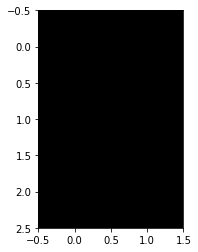

Número de pixels do elemento: 6
a - Razão de pixels pretos e total de pixels: 0.0
b - Razão das transições para preto e o total de pixels pretos: 0.0
a * b = 0.0
NÃO TEXTO


50


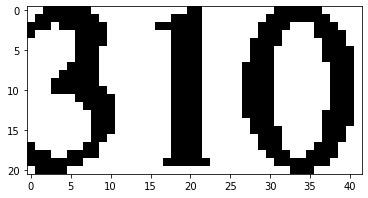

Número de pixels do elemento: 882
a - Razão de pixels pretos e total de pixels: 0.36848072562358275
b - Razão das transições para preto e o total de pixels pretos: 0.028514666355030967
a * b = 0.010507104949416172
TEXTO


51


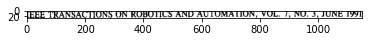

Número de pixels do elemento: 28750
a - Razão de pixels pretos e total de pixels: 0.29763478260869564
b - Razão das transições para preto e o total de pixels pretos: 0.7386934673366834
a * b = 0.21986086956521736
TEXTO




In [18]:
# plotando cada elemento conexo para comparar e encontrar um padrão no valor
# da razão dos números de transições verticais e horizontais pelo número de pixels pretos

count = 0
classificacao = []
img_9 = img_original.copy()
for cntr in contours:
    x, y, w, h = cv2.boundingRect(cntr)
    n_pixels = (h) * (w)
    print(count)
    plt.imshow(img_original[y:y + h, x:x + w], cmap = "gray")
    plt.show()
    print('Número de pixels do elemento:', n_pixels)
    print('a - Razão de pixels pretos e total de pixels:', razao_pixels_pretos[count])
    print('b - Razão das transições para preto e o total de pixels pretos:', razao_transicoes_pxlpretos[count])
    print('a * b =', razao_pixels_pretos[count] * razao_transicoes_pxlpretos[count])
    if razao_pixels_pretos[count] != 0 \
            and razao_pixels_pretos[count] > 0.07 \
            and razao_transicoes_pxlpretos[count] > 0.001 \
            and razao_transicoes_pxlpretos[count] < 1:
        classificacao.append(1)
        # draw contours
        # get bounding boxes on text elements
        pad = 10
        x,y,w,h = cv2.boundingRect(cntr)
        cv2.rectangle(img_9, (x-pad, y-pad), (x+w+pad, y+h+pad), (0, 0, 255), 4)
        print('TEXTO')
    else:
        classificacao.append(0)
        print('NÃO TEXTO')

    print("\n")
    count = count + 1

Número de elementos de texto: 39


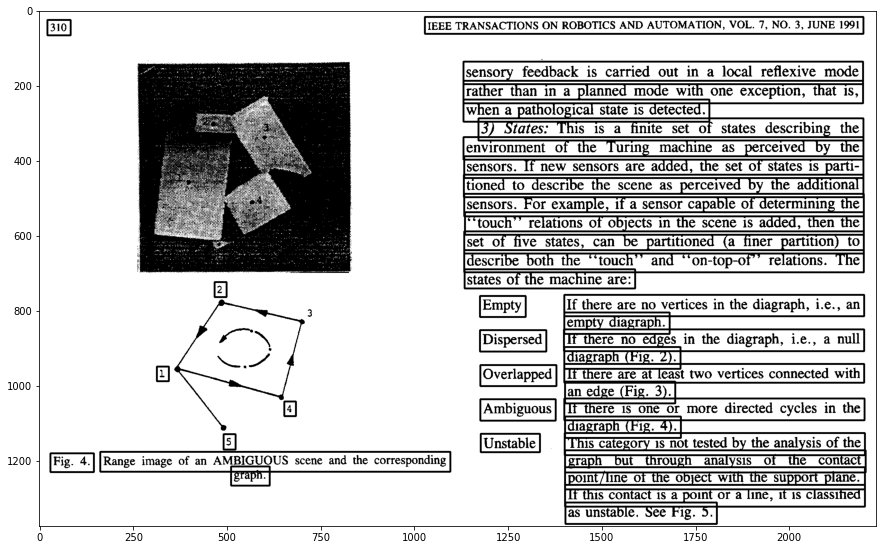

In [19]:
# display result
print('Número de elementos de texto:', sum(classificacao))
plt.figure(figsize = (15, 15))
plt.imshow(img_9, cmap = "gray")
plt.show()

---
10) Aplicação de operadores morfológicos apropriados para segmentar cada linha do texto em blocos de palavras. Coloque um retângulo envolvendo cada palavra na imagem original. Calcule o número total de linhas de texto e de blocos de palavras na imagem.

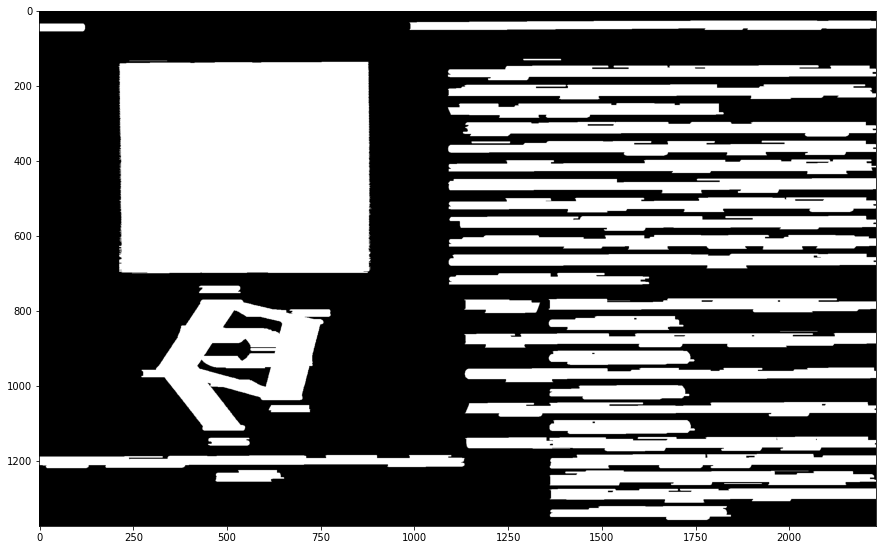

In [20]:
# dilatação horizontal
kernel = np.ones((1, 100))
img_10 = cv2.dilate(img, kernel, iterations = 1)

plt.figure(figsize = (15, 15))
plt.imshow(img_10, cmap = "gray")
plt.show()

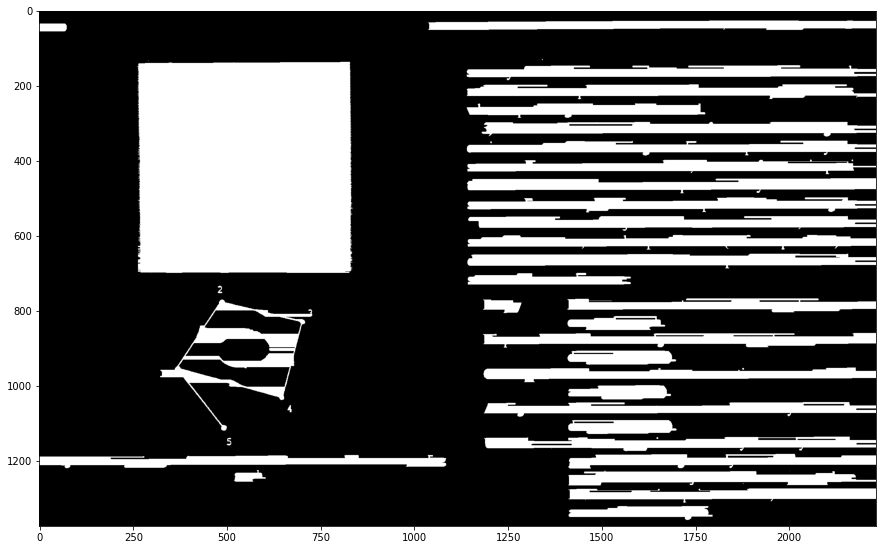

In [21]:
# erosão horizontal
# como foi aplicada à dilatação anterior e com mesmo elemento estruturante
# se trata do fechamento na direção horizontal

kernel = np.ones((1, 100))
img_11 = cv2.erode(img_10, kernel, iterations = 1)

plt.figure(figsize = (15, 15))
plt.imshow(img_11, cmap = "gray")
plt.show()

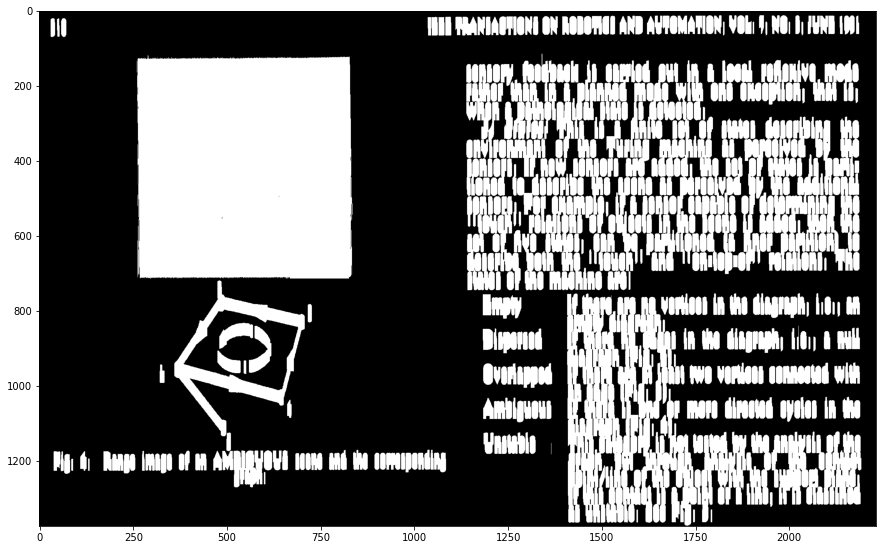

In [22]:
# dilatação vertical
kernel = np.ones((30, 1))
img_12 = cv2.dilate(img, kernel, iterations = 1)

plt.figure(figsize = (15, 15))
plt.imshow(img_12, cmap = "gray")
plt.show()

In [23]:
# erosão vertical
# como foi aplicada à dilatação anterior e com mesmo elemento estruturante
# se trata do fechamento na direção vertical

kernel = np.ones((30, 1))
img_13 = cv2.erode(img_12, kernel, iterations = 1)

plt.figure(figsize = (15, 15))
plt.imshow(img_13, cmap = "gray")
plt.show()

In [24]:
# intersecção dos resultados dos fechamentos horizontal e vertical dos passos anteriores

img_14 = np.bitwise_and(img_11, img_13)

plt.figure(figsize = (15, 15))
plt.imshow(img_14, cmap = "gray")
plt.show()

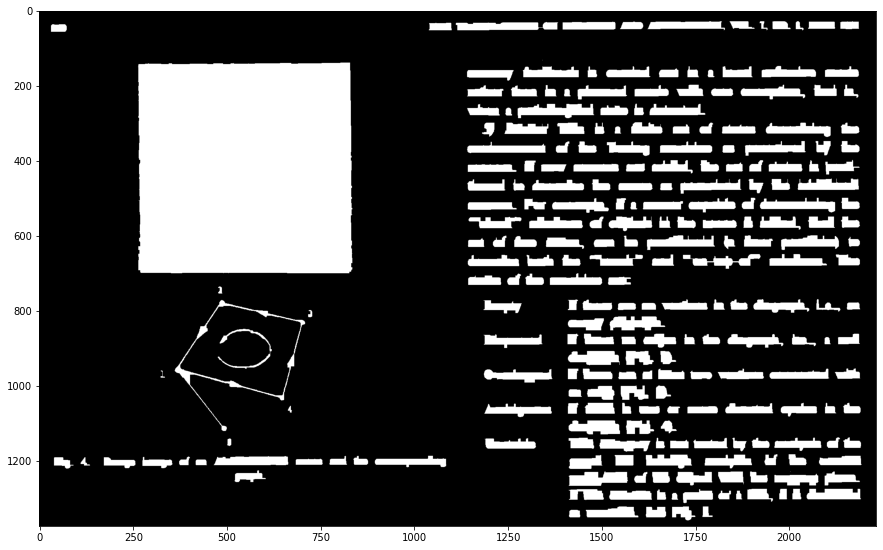

In [25]:
# fechamento do resultado da intersecção do passo anterior

kernel = np.ones((8, 12))

img_15 = cv2.morphologyEx(img_14, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize = (15, 15))
plt.imshow(img_15, cmap = "gray")
plt.show()

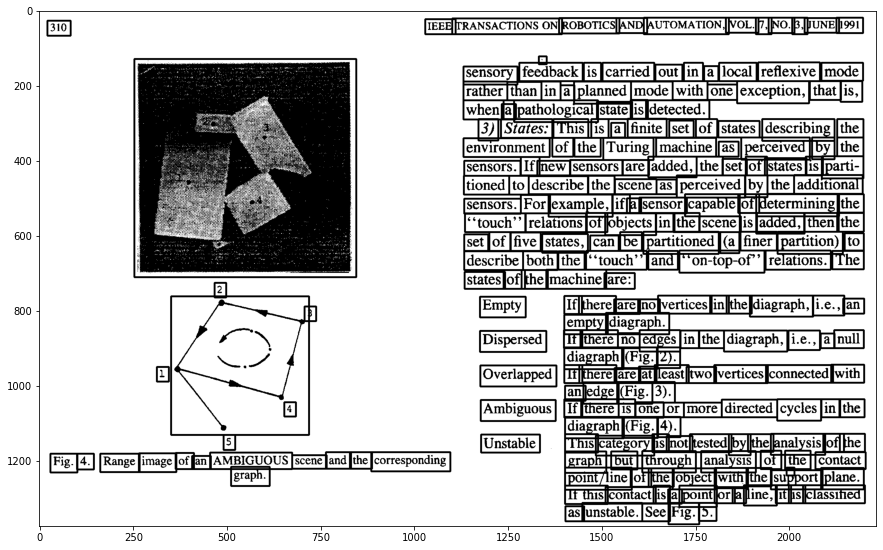

In [26]:
# gerar os bounding boxes para cada elemento conexo identificado na imagem original

# contornos
contours = cv2.findContours(img_15, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

# desenho dos retângulos
img_16 = img_original.copy()
for cntr in contours:
    # get bounding boxes
    pad = 10
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(img_16, (x-pad, y-pad), (x+w+pad, y+h+pad), (0, 0, 255), 4)
    

plt.figure(figsize = (15, 15))
plt.imshow(img_16, cmap = "gray")
plt.show()

In [27]:
# cálculos das métricas para avaliar se um elemento estruturante é texto ou não texto
# são as mesmas métricas e critérios utilizados no passo 8 e 9

# razão de pixels pretos pelo total de pixels do elemento
razao_pixels_pretos = []
for cntr in contours:
    x, y, w, h = cv2.boundingRect(cntr)
    n_pixels_pretos = np.sum(img[y:y + h, x:x + w]) / 255
    total_pixels = h * w
    razao_pixels_pretos.append(n_pixels_pretos / total_pixels)

# razão das transições de branco para preto e o total de pixels pretos no elemento
transicao_vert = []
transicao_hor = []
for cntr in contours:
    x, y, w, h = cv2.boundingRect(cntr)
    n_pixels_pretos = np.sum(img[y:y + h, x:x + w]) / 255
    if n_pixels_pretos != 0:
        transicao_vert.append(np.count_nonzero(np.diff(img_original[y:y + h, x:x + w] / 255, axis = 0)))
        transicao_hor.append(np.count_nonzero(np.diff(img_original[y:y + h, x:x + w] / 255, axis = -1)))
    else:
        transicao_vert.append(0)
        transicao_hor.append(0)

razao_transicoes_pxlpretos = ((np.array(transicao_vert) + np.array(transicao_hor)) / n_pixels_pretos).tolist()


# aplicação dos critérios para a decisão se o elemento e texto ou não texto
count = 0
classificacao = []
img_17 = img_original.copy()

for cntr in contours:
    x, y, w, h = cv2.boundingRect(cntr)
    n_pixels = (h) * (w)
    if razao_pixels_pretos[count] != 0 \
            and razao_pixels_pretos[count] > 0.06 \
            and razao_transicoes_pxlpretos[count] > 0.001 \
            and razao_transicoes_pxlpretos[count] < 1:
        classificacao.append(1)
        # draw contours
        # get bounding boxes on text elements
        pad = 10
        x,y,w,h = cv2.boundingRect(cntr)
        cv2.rectangle(img_17, (x-pad, y-pad), (x+w+pad, y+h+pad), (0, 0, 255), 4)
    else:
        classificacao.append(0)
    count = count + 1
    
# display result
print('Número de palavras:', sum(classificacao))
plt.figure(figsize = (15, 15))
plt.imshow(img_17, cmap = "gray")
plt.show()

Número de palavras: 240


In [28]:
# número de linhas de texto

# fechamento horizontal

kernel = np.ones((1, 200))

img_18 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

print('Resultado do fechamento horizontal')
plt.figure(figsize = (15, 15))
plt.imshow(img_18, cmap = "gray")
plt.show()



# gerar os bounding boxes para cada linha

# contornos
contours = cv2.findContours(img_18, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

# desenho dos retângulos
img_19 = img_original.copy()
for cntr in contours:
    # get bounding boxes
    pad = 10
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(img_19, (x-pad, y-pad), (x+w+pad, y+h+pad), (0, 0, 255), 4)
    
print('Bounding boxes nos elementos conexos da imagem')
plt.figure(figsize = (15, 15))
plt.imshow(img_19, cmap = "gray")
plt.show()


# cálculos das métricas para avaliar se um elemento estruturante é texto ou não texto
# são as mesmas métricas e critérios utilizados no passo 8 e 9

# razão de pixels pretos pelo total de pixels do elemento
razao_pixels_pretos = []
for cntr in contours:
    x, y, w, h = cv2.boundingRect(cntr)
    n_pixels_pretos = np.sum(img[y:y + h, x:x + w]) / 255
    total_pixels = h * w
    razao_pixels_pretos.append(n_pixels_pretos / total_pixels)

# razão das transições de branco para preto e o total de pixels pretos no elemento
transicao_vert = []
transicao_hor = []
for cntr in contours:
    x, y, w, h = cv2.boundingRect(cntr)
    n_pixels_pretos = np.sum(img[y:y + h, x:x + w]) / 255
    if n_pixels_pretos != 0:
        transicao_vert.append(np.count_nonzero(np.diff(img_original[y:y + h, x:x + w] / 255, axis = 0)))
        transicao_hor.append(np.count_nonzero(np.diff(img_original[y:y + h, x:x + w] / 255, axis = -1)))
    else:
        transicao_vert.append(0)
        transicao_hor.append(0)

razao_transicoes_pxlpretos = ((np.array(transicao_vert) + np.array(transicao_hor)) / n_pixels_pretos).tolist()


# aplicação dos critérios para a decisão se o elemento e texto ou não texto
count = 0
classificacao = []
img_20 = img_original.copy()

for cntr in contours:
    x, y, w, h = cv2.boundingRect(cntr)
    n_pixels = (h) * (w)
    if razao_pixels_pretos[count] != 0 \
            and razao_pixels_pretos[count] > 0.06 \
            and razao_transicoes_pxlpretos[count] > 0.001 \
            and razao_transicoes_pxlpretos[count] < 1:
        classificacao.append(1)
        # draw contours
        # get bounding boxes on text elements
        pad = 10
        x,y,w,h = cv2.boundingRect(cntr)
        cv2.rectangle(img_20, (x-pad, y-pad), (x+w+pad, y+h+pad), (0, 0, 255), 4)
    else:
        classificacao.append(0)
    count = count + 1
    
# display result
print('Resultado identificando somente os elementos de linhas consideradas como texto')
print('Número de linhas:', sum(classificacao))
plt.figure(figsize = (15, 15))
plt.imshow(img_20, cmap = "gray")
plt.show()

Resultado do fechamento horizontal


Bounding boxes nos elementos conexos da imagem


Resultado identificando somente os elementos de linhas consideradas como texto
Número de linhas: 32
